# Make sure the switch box setting connect the ZCU216 to the quantum chip 
Switchs wiring diagram can be found at: <br>
https://docs.google.com/document/d/19PCMW-sWQP9IDaH1ihExrhLNKL3zvspGWfvfol0w36c/edit#

X4Y2: <br> switchbox.switchset('http://192.168.1.204','AB')

X4Y1: <br>
switchbox.switchset('http://192.168.1.204','BD')<br>
switchbox.switchset('http://192.168.1.215','CD')

In [1]:
switchbox.switchset('http://192.168.1.204','AB')

NameError: name 'switchbox' is not defined

In [4]:
#%matplotlib widget #need this for click GUIs
import qubic.toolchain as tc
import qubic.rpc_client as rc
import qubitconfig.qchip as qc
from distproc.hwconfig import FPGAConfig, load_channel_configs
import numpy as np
import matplotlib.pyplot as plt
from chipcalibration import rabi
from importlib import reload
import qubic.state_disc as sd
import chipcalibration.config as cfg

In [5]:
fpga_config = FPGAConfig(**{'fpga_clk_period': 2.e-9, 'alu_instr_clks': 5, 'jump_cond_clks': 5, 'jump_fproc_clks': 5, 'pulse_regwrite_clks': 3})

qchipname = 'X4Y2'
fpga_config, qchip, channel_config = cfg.load_configs(qchipname)
chanmap = {'Q0':7,'Q2':1,'Q1':4,'Q3':3,'Q4':5,'Q5':6,'Q6':2}


In [6]:
runner = rc.CircuitRunnerClient(ip='192.168.1.247')

In [7]:
reload(rabi)
drvqubit=['Q3']
readqubits = ['Q3'] #['Q0', 'Q1', 'Q2', 'Q3', 'Q4']
nwidth = 140
pulse_widths = np.linspace(4.e-9, 140*4.e-9, nwidth)
i_rabi = rabi.Rabi(drvqubit=drvqubit, readqubits=readqubits,
                   pulse_widths=pulse_widths, qchip=qchip, 
                   fpga_config=fpga_config, channel_configs=channel_config)


Exception: 4096 exceeds max env length of 4095

In [19]:
i_rabi.run(runner, 100)

OSError: [Errno 113] No route to host

In [28]:
compiled_rabi = tc.run_compile_stage(i_rabi.circuits, fpga_config, qchip)

done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block

In [29]:
compiled_rabi[1].program

{('Q3.qdrv', 'Q3.rdrv', 'Q3.rdlo'): [{'op': 'phase_reset'},
  {'op': 'pulse',
   'freq': 5125000000,
   'phase': 0.0,
   'amp': 0.32479386965778895,
   'env': {'env_func': 'cos_edge_square',
    'paradict': {'ramp_fraction': 0.25, 'twidth': 8e-09}},
   'start_time': 200005,
   'dest': 'Q3.qdrv'},
  {'op': 'pulse',
   'freq': 6700437825.423339,
   'phase': 0.0,
   'amp': 0.017906057102356918,
   'env': {'env_func': 'cos_edge_square',
    'paradict': {'ramp_fraction': 0.25, 'twidth': 4e-06}},
   'start_time': 200009,
   'dest': 'Q3.rdrv'},
  {'op': 'pulse',
   'freq': 6700437825.423339,
   'phase': 3.0363641695072783,
   'amp': 1.0,
   'env': {'env_func': 'square',
    'paradict': {'phase': 0.0, 'amplitude': 1.0, 'twidth': 4e-06}},
   'start_time': 200309,
   'dest': 'Q3.rdlo'},
  {'op': 'done_stb'}]}

In [7]:
debug

> /usr/local/share/pynq-venv/lib/python3.10/site-packages/ipykernel/kernelbase.py(1219)_input_request()
   1217             except KeyboardInterrupt:
   1218                 # re-raise KeyboardInterrupt, to truncate traceback
-> 1219                 raise KeyboardInterrupt("Interrupted by user") from None
   1220             except Exception:
   1221                 self.log.warning("Invalid Message:", exc_info=True)

ipdb> q


In [23]:
i_rabi.circuits

[[{'name': 'delay', 't': 0.0004},
  {'name': 'rabi', 'qubit': ['Q1'], 'modi': {(0, 'twidth'): 4e-09}},
  {'name': 'read', 'qubit': ['Q0']},
  {'name': 'read', 'qubit': ['Q1']},
  {'name': 'read', 'qubit': ['Q2']},
  {'name': 'read', 'qubit': ['Q3']},
  {'name': 'read', 'qubit': ['Q4']}],
 [{'name': 'delay', 't': 0.0004},
  {'name': 'rabi', 'qubit': ['Q1'], 'modi': {(0, 'twidth'): 8e-09}},
  {'name': 'read', 'qubit': ['Q0']},
  {'name': 'read', 'qubit': ['Q1']},
  {'name': 'read', 'qubit': ['Q2']},
  {'name': 'read', 'qubit': ['Q3']},
  {'name': 'read', 'qubit': ['Q4']}],
 [{'name': 'delay', 't': 0.0004},
  {'name': 'rabi',
   'qubit': ['Q1'],
   'modi': {(0, 'twidth'): 1.2000000000000002e-08}},
  {'name': 'read', 'qubit': ['Q0']},
  {'name': 'read', 'qubit': ['Q1']},
  {'name': 'read', 'qubit': ['Q2']},
  {'name': 'read', 'qubit': ['Q3']},
  {'name': 'read', 'qubit': ['Q4']}],
 [{'name': 'delay', 't': 0.0004},
  {'name': 'rabi', 'qubit': ['Q1'], 'modi': {(0, 'twidth'): 1.6e-08}},
  {'n

In [15]:
print(i_rabi.ones_frac)
print(i_rabi.zeros_frac)

{'Q0': array([ 86,  91, 112,  75,  77,  95,  95,  66, 108,  66,  89,  85,  74,
        74,  63,  57,  46,  76,  65,  69,  58,  62,  70,  62,  83,  50,
        48,  37,  37,  56,  35,  46,  48,  42,  42,  37,  48,  44,  42,
        41,  41,  41,  44,  33,  45,  42,  45,  45,  42,  56,  44,  46,
        28,  43,  47,  63,  43,  51,  47,  40,  67,  57,  41,  51,  60,
        43,  42,  44,  48,  30,  66,  46,  51,  46,  51,  40,  45,  45,
        57,  44,  55,  58,  47,  47,  41,  55,  44,  45,  58,  50,  51,
        44,  52,  50,  60,  53,  43,  64,  45,  47,  73,  45,  43,  49,
        50,  56,  53,  54,  63,  58,  51,  56,  44,  37,  37,  48,  40,
        55,  73,  68,  50,  57,  56,  53,  62,  56,  65,  64,  64,  64,
        64,  64,  64,  64,  64,  64,  64,  64,  64,  64]), 'Q1': array([67, 70, 70, 41, 66, 63, 77, 43, 89, 41, 75, 57, 55, 62, 51, 39, 39,
       52, 38, 46, 41, 48, 50, 38, 53, 38, 38, 24, 29, 33, 28, 39, 36, 32,
       37, 29, 30, 35, 27, 25, 30, 28, 31, 28, 35, 24, 32,

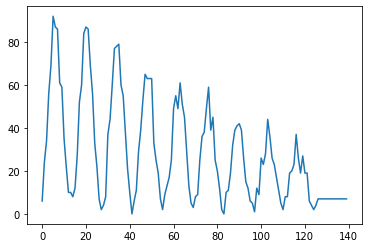

In [37]:
plt.plot(i_rabi.ones_frac['Q3'])

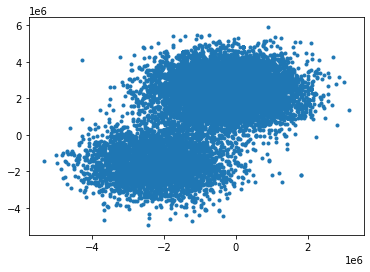

In [34]:
plt.plot(np.real(i_rabi.s11[3].flatten()), np.imag(i_rabi.s11[3].flatten()), '.')

In [18]:
i_rabi.s11[1].shape

(140, 100, 1)

In [47]:
np.zeros((3,4)).shape

(3, 4)

In [7]:
debug

> /home/xilinx/software/qubic/state_disc.py(106)set_labels_maxtomin()
    104             if isinstance(chan, str): #iq_shot_dict is indexed by qubit
    105                 result = self.gmm_dict[chan].predict(iq_shots)
--> 106                 if output_keys == 'qubit':
    107                     result_dict[chan] = result
    108                 elif output_keys == 'channel':

ipdb> result
*** NameError: name 'result' is not defined
ipdb> q


In [22]:
i_rabi.s11

{2: array([-7455010. +556331.j, -3852551.-2619945.j, -3012646.-1468984.j, ...,
        -1956156.-1949457.j, -2817337.-1680015.j, -1871286.-1502131.j]),
 4: array([-2476289.+2107168.j,  1500060. +967335.j, -2378779.-1926234.j, ...,
        -1629420.-2289513.j, -1381087.-2234042.j, -1810679.-1969196.j]),
 1: array([ -436402.+5172281.j,   694643.+2967200.j, -2028462.-2392060.j, ...,
        -1122191.+1183144.j,  1236526.+3790050.j,  -366951.+2096431.j]),
 3: array([ 1445299.+7647849.j, -1324437.+1900527.j,  -167153. +376026.j, ...,
        -1310700.+3305294.j,  -567708.+3538473.j,    56152.+2582544.j]),
 5: array([68651625.-61283167.j, -2728502.   +91304.j, -3622123. +1681065.j,
        ..., -3525538.  +227718.j, -2761361. +4210469.j,
        -2545626. +1736525.j])}

In [23]:
i_rabi.readout_chanmap

{'Q0': 2, 'Q1': 4, 'Q2': 1, 'Q3': 3, 'Q4': 5}

In [20]:
reload(sd)
gmm = sd.GMMManager(chanmap_or_chan_cfgs=channel_config)

In [21]:
gmm.fit(chevron.s11)

In [22]:
result = gmm.predict(chevron.s11)

In [23]:
gmm.set_labels_maxtomin({chan: shots[0].flatten() 
                                      for chan, shots in chevron.s11.items()}, [0, 1])

In [24]:
state_disc_shots = gmm.predict(chevron.s11)

In [26]:
ones_frac = {qubit: np.sum(state_disc_shots[qubit], axis=2) for qubit in state_disc_shots.keys()}

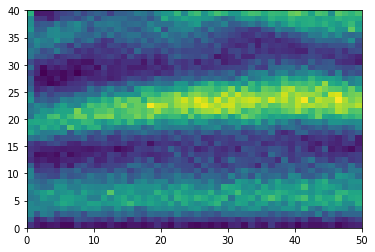

In [36]:
plt.pcolormesh(ones_frac['Q1'])